In [ ]:
#Прогнозирование временных рядов с помощью рекуррентных нейронных сетей LSTM в Python с Keras

#Описание проблемы###########################################

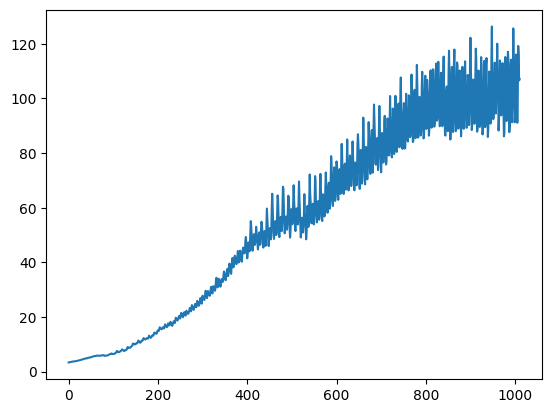

In [73]:
#После загрузки вы можете легко построить весь набор данных. Код для загрузки и построения набора данных приведен ниже.
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('IPG2211A2N.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [ ]:
#Сеть долговременной памяти##################################################
#Сеть LSTM для регрессии#####################################################

In [20]:
#Прежде чем начать, давайте сначала импортируем все функции и классы, которые вы будете использовать. Это предполагает рабочую среду SciPy 
#с установленной библиотекой глубокого обучения Keras.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow
from  tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [21]:

# исправить случайное начальное число для воспроизводимости
tf.random.set_seed(7)

In [22]:

# загрузить набор данных
dataframe = pd.read_csv('IPG2211A2N.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [23]:

# нормализовать набор данных
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [24]:

# разделить на обучающие и тестовые наборы
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

677 334


In [48]:
#Его можно настроить, создав набор данных другой формы в следующем разделе.

# преобразовать массив значений в матрицу набора данных
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [49]:

# преобразовать в X=t и Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [50]:

# изменить форму ввода, чтобы он был [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [51]:

# создать и настроить сеть LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
675/675 - 4s - loss: 0.0387 - 4s/epoch - 6ms/step
Epoch 2/100
675/675 - 1s - loss: 0.0098 - 1s/epoch - 2ms/step
Epoch 3/100
675/675 - 1s - loss: 0.0012 - 1s/epoch - 2ms/step
Epoch 4/100
675/675 - 1s - loss: 6.6867e-04 - 1s/epoch - 2ms/step
Epoch 5/100
675/675 - 1s - loss: 6.7247e-04 - 1s/epoch - 2ms/step
Epoch 6/100
675/675 - 1s - loss: 6.6696e-04 - 1s/epoch - 2ms/step
Epoch 7/100
675/675 - 1s - loss: 6.6906e-04 - 1s/epoch - 2ms/step
Epoch 8/100
675/675 - 2s - loss: 6.7573e-04 - 2s/epoch - 2ms/step
Epoch 9/100
675/675 - 2s - loss: 6.6776e-04 - 2s/epoch - 3ms/step
Epoch 10/100
675/675 - 1s - loss: 6.5561e-04 - 1s/epoch - 2ms/step
Epoch 11/100
675/675 - 1s - loss: 6.6285e-04 - 1s/epoch - 2ms/step
Epoch 12/100
675/675 - 1s - loss: 6.6765e-04 - 1s/epoch - 2ms/step
Epoch 13/100
675/675 - 1s - loss: 6.4528e-04 - 1s/epoch - 2ms/step
Epoch 14/100
675/675 - 1s - loss: 6.4959e-04 - 1s/epoch - 2ms/step
Epoch 15/100
675/675 - 1s - loss: 6.7880e-04 - 1s/epoch - 2ms/step
Epoch 16/100
675

In [52]:

# делать предсказания
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# инвертировать предсказания
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# вычислить среднеквадратичную ошибку
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

11/11 [==============================] - 0s 3ms/step
Train Score: 3.03 RMSE
Test Score: 10.59 RMSE


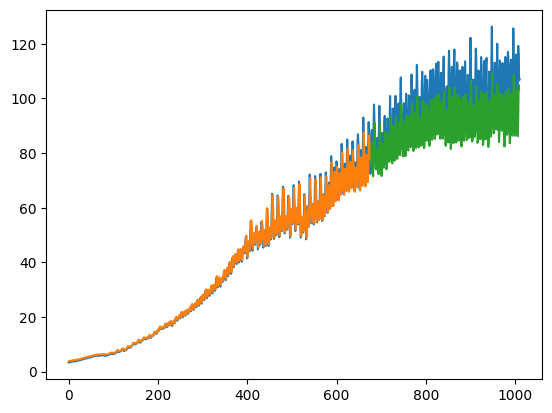

In [53]:

# прогнозы сменных поездов для построения графика
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
#предсказания теста сдвига для построения графика
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# сюжетная линия и прогнозы
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/100
675/675 - 3s - loss: 0.0357
Epoch 2/100
675/675 - 1s - loss: 0.0096
Epoch 3/100
675/675 - 1s - loss: 0.0011
Epoch 4/100
675/675 - 1s - loss: 6.8271e-04
Epoch 5/100
675/675 - 1s - loss: 6.8420e-04
Epoch 6/100
675/675 - 2s - loss: 6.7640e-04
Epoch 7/100
675/675 - 1s - loss: 6.7473e-04
Epoch 8/100
675/675 - 1s - loss: 6.8044e-04
Epoch 9/100
675/675 - 1s - loss: 6.7037e-04
Epoch 10/100
675/675 - 1s - loss: 6.5676e-04
Epoch 11/100
675/675 - 1s - loss: 6.6364e-04
Epoch 12/100
675/675 - 1s - loss: 6.6557e-04
Epoch 13/100
675/675 - 1s - loss: 6.4288e-04
Epoch 14/100
675/675 - 1s - loss: 6.4835e-04
Epoch 15/100
675/675 - 1s - loss: 6.7507e-04
Epoch 16/100
675/675 - 1s - loss: 6.4490e-04
Epoch 17/100
675/675 - 2s - loss: 6.5127e-04
Epoch 18/100
675/675 - 2s - loss: 6.5516e-04
Epoch 19/100
675/675 - 1s - loss: 6.3630e-04
Epoch 20/100
675/675 - 1s - loss: 6.4148e-04
Epoch 21/100
675/675 - 1s - loss: 6.2669e-04
Epoch 22/100
675/675 - 1s - loss: 6.4300e-04
Epoch 23/100
675/675 - 1s - los

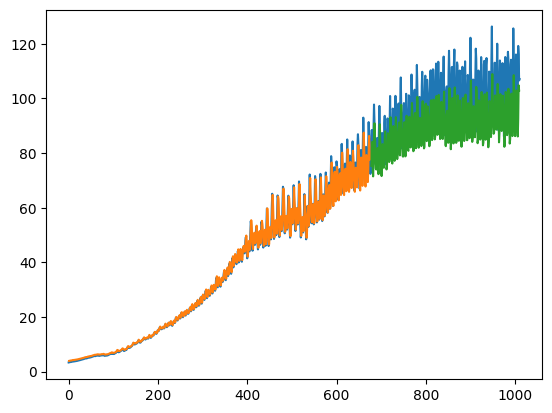

In [56]:

#LSTM для проблемы пассажиров международных авиакомпаний с регрессионным кадрированием
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# преобразовать массив значений в матрицу набора данных
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)
# исправить случайное начальное число для воспроизводимости
tf.random.set_seed(7)
# загрузить набор данных
dataframe = read_csv('IPG2211A2N.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# нормализовать набор данных
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
#разделить на обучающие и тестовые наборы
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
#преобразовываться в X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# изменить форму ввода, чтобы он был [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# создать и настроить сеть LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# делать предсказания
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# инвертировать предсказания
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# вычислить среднеквадратичную ошибку
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# прогнозы сменных поездов для построения графика
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# предсказания теста сдвига для построения графика
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# сюжетная линия и прогнозы
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/100
673/673 - 3s - loss: 0.0297 - 3s/epoch - 5ms/step
Epoch 2/100
673/673 - 2s - loss: 0.0017 - 2s/epoch - 3ms/step
Epoch 3/100
673/673 - 1s - loss: 0.0013 - 1s/epoch - 2ms/step
Epoch 4/100
673/673 - 1s - loss: 0.0013 - 1s/epoch - 2ms/step
Epoch 5/100
673/673 - 1s - loss: 0.0013 - 1s/epoch - 2ms/step
Epoch 6/100
673/673 - 1s - loss: 0.0012 - 1s/epoch - 2ms/step
Epoch 7/100
673/673 - 1s - loss: 0.0011 - 1s/epoch - 2ms/step
Epoch 8/100
673/673 - 1s - loss: 0.0011 - 1s/epoch - 2ms/step
Epoch 9/100
673/673 - 1s - loss: 0.0010 - 1s/epoch - 2ms/step
Epoch 10/100
673/673 - 1s - loss: 0.0010 - 1s/epoch - 2ms/step
Epoch 11/100
673/673 - 2s - loss: 9.6873e-04 - 2s/epoch - 2ms/step
Epoch 12/100
673/673 - 2s - loss: 9.1955e-04 - 2s/epoch - 3ms/step
Epoch 13/100
673/673 - 1s - loss: 9.0690e-04 - 1s/epoch - 2ms/step
Epoch 14/100
673/673 - 1s - loss: 8.6527e-04 - 1s/epoch - 2ms/step
Epoch 15/100
673/673 - 1s - loss: 8.5105e-04 - 1s/epoch - 2ms/step
Epoch 16/100
673/673 - 1s - loss: 8.0181e-04

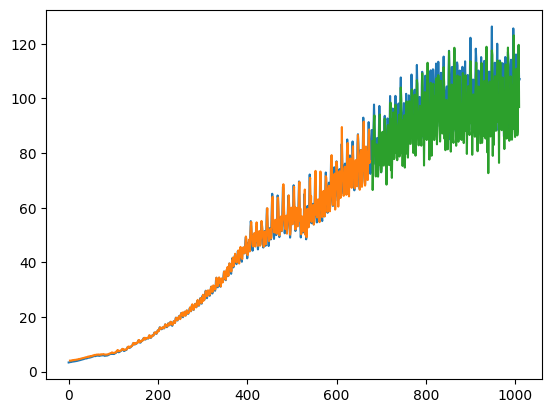

In [58]:
#LSTM для регрессии с использованием метода окна

# LSTM для проблемы пассажиров международных авиакомпаний с регрессионным обрамлением окна
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# преобразовать массив значений в матрицу набора данных
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)
# исправить случайное начальное число для воспроизводимости
tf.random.set_seed(7)
# загрузить набор данных
dataframe = read_csv('IPG2211A2N.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# нормализовать набор данных
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# разделить на обучающие и тестовые наборы
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# преобразовываться в X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# изменить форму ввода, чтобы он был [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# создать и настроить сеть LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# делать предсказания
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# iинвертировать предсказания
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# вычислить среднеквадратичную ошибку
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# прогнозы сменных поездов для построения графика
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# предсказания теста сдвига для построения графика
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# сюжетная линия и прогнозы
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [60]:
#LSTM for Regression with Time Steps###########################################################


Epoch 1/100
673/673 - 3s - loss: 0.0223
Epoch 2/100
673/673 - 1s - loss: 0.0019
Epoch 3/100
673/673 - 2s - loss: 0.0015
Epoch 4/100
673/673 - 1s - loss: 0.0015
Epoch 5/100
673/673 - 2s - loss: 0.0014
Epoch 6/100
673/673 - 2s - loss: 0.0014
Epoch 7/100
673/673 - 2s - loss: 0.0014
Epoch 8/100
673/673 - 1s - loss: 0.0013
Epoch 9/100
673/673 - 2s - loss: 0.0013
Epoch 10/100
673/673 - 2s - loss: 0.0013
Epoch 11/100
673/673 - 2s - loss: 0.0013
Epoch 12/100
673/673 - 2s - loss: 0.0012
Epoch 13/100
673/673 - 3s - loss: 0.0013
Epoch 14/100
673/673 - 2s - loss: 0.0012
Epoch 15/100
673/673 - 2s - loss: 0.0012
Epoch 16/100
673/673 - 2s - loss: 0.0012
Epoch 17/100
673/673 - 2s - loss: 0.0011
Epoch 18/100
673/673 - 2s - loss: 0.0011
Epoch 19/100
673/673 - 2s - loss: 0.0011
Epoch 20/100
673/673 - 3s - loss: 0.0011
Epoch 21/100
673/673 - 2s - loss: 0.0010
Epoch 22/100
673/673 - 2s - loss: 0.0010
Epoch 23/100
673/673 - 2s - loss: 9.6366e-04
Epoch 24/100
673/673 - 2s - loss: 9.5544e-04
Epoch 25/100
673/

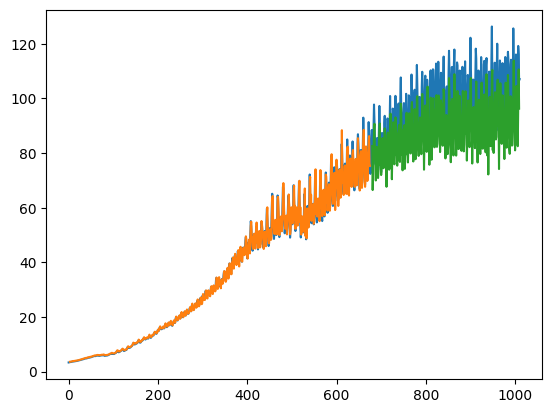

In [65]:

# LSTM для проблемы пассажиров международных авиалиний с построением временной регрессии
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# преобразовать массив значений в матрицу набора данных
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)
# исправить случайное начальное число для воспроизводимости
tf.random.set_seed(7)
# загрузить набор данных
dataframe = read_csv('IPG2211A2N.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# нормализовать набор данных
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# разделить на обучающие и тестовые наборы
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# преобразовываться в X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# изменить форму ввода, чтобы он был [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# создать и настроить сеть LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# делать предсказания
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# инвертировать предсказания
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# вычислить среднеквадратичную ошибку
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# прогнозы сменных поездов для построения графика
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# предсказания теста сдвига для построения графика
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# сюжетная линия и прогнозы
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

673/673 - 5s - loss: 9.1106e-04 - 5s/epoch - 7ms/step
673/673 - 3s - loss: 0.0016 - 3s/epoch - 4ms/step
673/673 - 3s - loss: 0.0011 - 3s/epoch - 4ms/step
673/673 - 2s - loss: 9.6262e-04 - 2s/epoch - 3ms/step
673/673 - 2s - loss: 9.1698e-04 - 2s/epoch - 3ms/step
673/673 - 2s - loss: 8.9093e-04 - 2s/epoch - 3ms/step
673/673 - 2s - loss: 8.6822e-04 - 2s/epoch - 2ms/step
673/673 - 2s - loss: 8.4621e-04 - 2s/epoch - 3ms/step
673/673 - 4s - loss: 8.2466e-04 - 4s/epoch - 5ms/step
673/673 - 1s - loss: 8.0358e-04 - 1s/epoch - 2ms/step
673/673 - 2s - loss: 7.8290e-04 - 2s/epoch - 2ms/step
673/673 - 2s - loss: 7.6244e-04 - 2s/epoch - 3ms/step
673/673 - 2s - loss: 7.4197e-04 - 2s/epoch - 3ms/step
673/673 - 2s - loss: 7.2123e-04 - 2s/epoch - 3ms/step
673/673 - 3s - loss: 6.9999e-04 - 3s/epoch - 4ms/step
673/673 - 2s - loss: 6.7808e-04 - 2s/epoch - 3ms/step
673/673 - 1s - loss: 6.5546e-04 - 1s/epoch - 2ms/step
673/673 - 3s - loss: 6.3218e-04 - 3s/epoch - 4ms/step
673/673 - 2s - loss: 6.0839e-04 - 2s

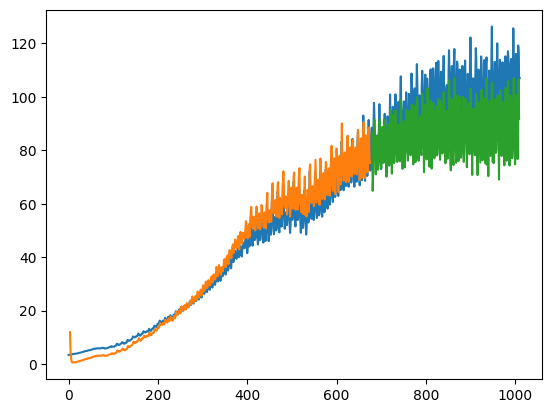

In [66]:
#LSTM с памятью между партиями#####################################################

# LSTM для пассажиров международных авиалиний проблема с памятью
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# преобразовать массив значений в матрицу набора данных
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)
# исправить случайное начальное число для воспроизводимости
tf.random.set_seed(7)
# загрузить набор данных
dataframe = read_csv('IPG2211A2N.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# нормализовать набор данных
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# разделить на обучающие и тестовые наборы
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# преобразовываться в X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# изменить форму ввода, чтобы он был[samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# создать и настроить сеть LSTM
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
 model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
 model.reset_states()
# делать предсказания
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# инвертировать предсказания
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# вычислить среднеквадратичную ошибку
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# прогнозы сменных поездов для построения графика
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# предсказания теста сдвига для построения графика
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# сюжетная линия и прогнозы
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

673/673 - 6s - loss: 9.3204e-04 - 6s/epoch - 9ms/step
673/673 - 3s - loss: 0.0036 - 3s/epoch - 5ms/step
673/673 - 3s - loss: 0.0026 - 3s/epoch - 4ms/step
673/673 - 2s - loss: 0.0016 - 2s/epoch - 3ms/step
673/673 - 4s - loss: 0.0011 - 4s/epoch - 5ms/step
673/673 - 4s - loss: 0.0011 - 4s/epoch - 6ms/step
673/673 - 3s - loss: 0.0011 - 3s/epoch - 4ms/step
673/673 - 2s - loss: 0.0011 - 2s/epoch - 4ms/step
673/673 - 3s - loss: 0.0010 - 3s/epoch - 4ms/step
673/673 - 2s - loss: 9.6326e-04 - 2s/epoch - 3ms/step
673/673 - 4s - loss: 8.6414e-04 - 4s/epoch - 5ms/step
673/673 - 3s - loss: 8.4635e-04 - 3s/epoch - 4ms/step
673/673 - 3s - loss: 0.0011 - 3s/epoch - 4ms/step
673/673 - 2s - loss: 9.1818e-04 - 2s/epoch - 4ms/step
673/673 - 3s - loss: 8.7747e-04 - 3s/epoch - 4ms/step
673/673 - 3s - loss: 6.7857e-04 - 3s/epoch - 4ms/step
673/673 - 3s - loss: 7.1178e-04 - 3s/epoch - 4ms/step
673/673 - 3s - loss: 6.1890e-04 - 3s/epoch - 4ms/step
673/673 - 3s - loss: 5.9431e-04 - 3s/epoch - 5ms/step
673/673 - 

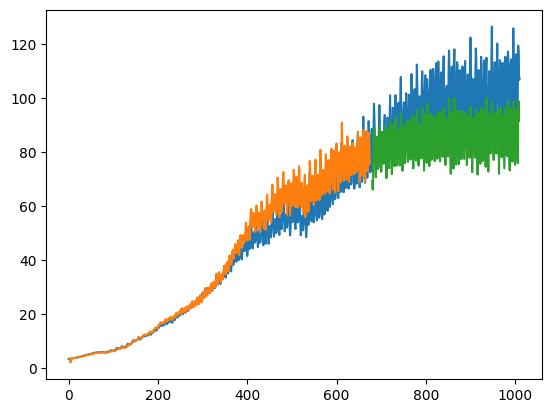

In [67]:
#Стекированные LSTM с памятью между пакетами######################################

# Stacked LSTM для проблемы пассажиров международных авиалиний с памятью
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# преобразовать массив значений в матрицу набора данных
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)
# исправить случайное начальное число для воспроизводимости
tf.random.set_seed(7)
# загрузить набор данных
dataframe = read_csv('IPG2211A2N.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# нормализовать набор данных
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# разделить на обучающие и тестовые наборы
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# преобразовываться в X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# изменить форму ввода, чтобы он был[samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# создать и настроить сеть LSTM
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
 model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
 model.reset_states()
# делать предсказания
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# инвертировать предсказания
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# вычислить среднеквадратичную ошибку
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# прогнозы сменных поездов для построения графика
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# предсказания теста сдвига для построения графика
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# сюжетная линия и прогнозы
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()